In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeRegressor

from dmba import plotDecisionTree

In [2]:
movies_df = pd.read_csv('Movies.csv')
predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'num_voted_users', 
              'cast_total_facebook_likes', 'budget', 'title_year', 'actor_2_facebook_likes', 
              'movie_facebook_likes', 'language_Arabic', 'language_Aramaic', 'language_Bosnian', 
              'language_Cantonese', 'language_Chinese', 'language_Czech', 'language_Danish', 
              'language_Dari', 'language_Dutch', 'language_Dzongkha', 'language_English', 
              'language_Filipino', 'language_French', 'language_German', 'language_Greek', 
              'language_Hebrew', 'language_Hindi', 'language_Hungarian', 'language_Icelandic', 
              'language_Indonesian', 'language_Italian', 'language_Japanese', 'language_Kazakh', 
              'language_Korean', 'language_Mandarin', 'language_Maya', 'language_Mongolian', 
              'language_None', 'language_Norwegian', 'language_Persian', 'language_Polish', 
              'language_Portuguese', 'language_Romanian', 'language_Russian', 'language_Spanish', 
              'language_Swedish', 'language_Telugu', 'language_Thai', 'language_Vietnamese', 
              'language_Zulu', 'country_Argentina', 'country_Aruba', 'country_Australia', 
              'country_Belgium', 'country_Brazil', 'country_Cameroon', 'country_Canada', 
              'country_Chile', 'country_China', 'country_Colombia', 'country_Czech Republic', 
              'country_Denmark', 'country_Finland', 'country_France', 'country_Georgia', 
              'country_Germany', 'country_Greece', 'country_Hong Kong', 'country_Hungary', 
              'country_Iceland', 'country_India', 'country_Indonesia', 'country_Iran', 
              'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan', 
              'country_Mexico', 'country_Netherlands', 'country_New Line', 'country_New Zealand', 
              'country_Norway', 'country_Peru', 'country_Philippines', 'country_Poland', 
              'country_Romania', 'country_Russia', 'country_South Africa', 'country_South Korea', 
              'country_Spain', 'country_Sweden', 'country_Taiwan', 'country_Thailand', 'country_UK', 
              'country_USA', 'country_West Germany', 'content_rating_G', 'content_rating_GP', 
              'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated', 
              'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R', 
              'content_rating_Unrated', 'content_rating_X']

In [8]:
X = movies_df[predictors]
y = movies_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1)
X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (2493, 106)
y_train Shape:  (2493,)
X_train_s Shape:  (1994, 106)
X_tune Shape:  (499, 106)
y_train_s Shape:  (1994,)
y_tune Shape:  (499,)


In [9]:
result_df = pd.DataFrame(index=X_test.index, columns=['Actual', 'MLP_tuned'])
result_df.Actual = y_test

In [10]:
# Tuned MLP

# Repetitions
num_repetition = 5

# Create placeholder for experimentations
activation_options = ['identity', 'logistic', 'tanh', 'relu']
solver_options = ['lbfgs','sgd','adam']
my_index = pd.MultiIndex.from_product([activation_options,solver_options], names=('activation', 'solver'))
tune_df = pd.DataFrame(index = my_index, columns=['R{}'.format(i) for i in range(num_repetition)])

n = len(y_tune)
for activation_o in activation_options:
    for solver_o in solver_options:
        for rep in tune_df.columns:
            mlp = MLPRegressor(hidden_layer_sizes=(5), max_iter=2000,
                                   activation=activation_o,solver=solver_o)

            mlp.fit(X_train_s, y_train_s)
            y_tune_predict = mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(activation_o,solver_o),rep] = RSME
            
# Show table
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optim

R0                  R1  \
activation solver                                     
identity   sgd         0.000000            0.000000   
logistic   lbfgs       1.026478            1.034829   
           adam        1.392020            1.033117   
tanh       lbfgs       1.034702            1.031797   
relu       adam        1.032953            7.441691   
tanh       adam        1.033634            1.034918   
relu       lbfgs      14.802945          354.462474   
logistic   sgd         1.041357            1.035639   
tanh       sgd         1.041970            1.041857   
identity   lbfgs       4.985078          102.062303   
           adam     3781.738413         1769.319538   
relu       sgd     99599.685904  75337633330.463821   

                                                         R2             R3  \
activation solver                                                            
identity   sgd                                     0.000000       0.000000   
logistic   lbfgs                                   1.032101       1.034702   
           adam                                    1.041419       1.036704   
tanh       lbfgs                                   1.037866       1.035020   
relu       adam                                    1.092492  564314.065324   
tanh       adam                                    1.491205       1.039196   
relu       lbfgs                                   5.063589       1.035023   
logistic   sgd                                     1.057760       1.048881   
tanh       sgd                                     1.060318       1.058676   
identity   lbfgs                                  37.693998      36.849268   
           adam                                 1366.705465    2090.509699   
relu       sgd     323938827990976633704072012103680.000000   57932.954508   

                                                   R4          Mean  \
activation solver                                                     
identity   sgd                               0.000000  0.000000e+00   
logistic   lbfgs                             1.034775  1.032577e+00   
           adam                              1.030605  1.106773e+00   
tanh       lbfgs                             1.035242  1.034925e+00   
relu       adam                           2599.394778  1.133846e+05   
tanh       adam                              1.033558  1.126502e+00   
relu       lbfgs                             1.035023  7.527981e+01   
logistic   sgd                               1.043569  1.045441e+00   
tanh       sgd                               1.069746  1.054513e+00   
identity   lbfgs                             8.557725  3.802967e+01   
           adam                           3935.749051  2.588804e+03   
relu       sgd     277494855279907730851102720.000000  6.478782e+31   

                            Min  
activation solver                
identity   sgd         0.000000  
logistic   lbfgs       1.026478  
           adam        1.030605  
tanh       lbfgs       1.031797  
relu       adam        1.032953  
tanh       adam        1.033558  
relu       lbfgs       1.035023  
logistic   sgd         1.035639  
tanh       sgd         1.041857  
identity   lbfgs       4.985078  
           adam     1366.705465  
relu       sgd     57932.954508

In [11]:
tune_df.sort_values('Mean')
# logistic and lbfgs

,,R0,R1,R2,R3,R4,Mean,Min
activation,solver,,,,,,,
identity,sgd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
logistic,lbfgs,1.026478,1.034829,1.032101,1.034702,1.034775,1.032577e+00,1.026478
tanh,lbfgs,1.034702,1.031797,1.037866,1.035020,1.035242,1.034925e+00,1.031797
logistic,sgd,1.041357,1.035639,1.057760,1.048881,1.043569,1.045441e+00,1.035639
tanh,sgd,1.041970,1.041857,1.060318,1.058676,1.069746,1.054513e+00,1.041857
logistic,adam,1.392020,1.033117,1.041419,1.036704,1.030605,1.106773e+00,1.030605
tanh,adam,1.033634,1.034918,1.491205,1.039196,1.033558,1.126502e+00,1.033558
identity,lbfgs,4.985078,102.062303,37.693998,36.849268,8.557725,3.802967e+01,4.985078
relu,lbfgs,14.802945,354.462474,5.063589,1.035023,1.035023,7.527981e+01,1.035023


In [12]:
# Tune for hidden layer size
# This code is basically creating a list of 15 one layered ANN ([1] - [15]) 
# and 100 two layered ANNs ([1,1] - [10,10])

PossibleNetStrct = []
PossibleNetString = []

for i in range(1,16):
    netStruct = [i]
    PossibleNetStrct.append(netStruct)
    PossibleNetString.append(str(netStruct))
    print('Network Structure:', netStruct)
    
for i in range(1,11):
    for j in range(1,11):
        netStruct = [i,j]
        PossibleNetStrct.append(netStruct)
        PossibleNetString.append(str(netStruct))
        print('Network Structure:', netStruct)
        
tune_df = pd.DataFrame(np.nan, index =PossibleNetString,
                      columns = ['R{}'.format(i) for i in range(num_repetition)])

n = len(y_tune)

for i,netStr in enumerate(PossibleNetStrct):
    RowName = PossibleNetString[i]
    for rep in tune_df.columns:
        
        mlp = MLPRegressor(hidden_layer_sizes=netStr, activation = 'logistic', 
                       solver='lbfgs', max_iter=2000)
        mlp.fit(X_train_s, y_train_s)
        
        y_tune_predict = mlp.predict(X_tune)
        RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
        
        tune_df.at[RowName, rep] = RSME
    print(netStr)

tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

Network Structure: [1]
Network Structure: [2]
Network Structure: [3]
Network Structure: [4]
Network Structure: [5]
Network Structure: [6]
Network Structure: [7]
Network Structure: [8]
Network Structure: [9]
Network Structure: [10]
Network Structure: [11]
Network Structure: [12]
Network Structure: [13]
Network Structure: [14]
Network Structure: [15]
Network Structure: [1, 1]
Network Structure: [1, 2]
Network Structure: [1, 3]
Network Structure: [1, 4]
Network Structure: [1, 5]
Network Structure: [1, 6]
Network Structure: [1, 7]
Network Structure: [1, 8]
Network Structure: [1, 9]
Network Structure: [1, 10]
Network Structure: [2, 1]
Network Structure: [2, 2]
Network Structure: [2, 3]
Network Structure: [2, 4]
Network Structure: [2, 5]
Network Structure: [2, 6]
Network Structure: [2, 7]
Network Structure: [2, 8]
Network Structure: [2, 9]
Network Structure: [2, 10]
Network Structure: [3, 1]
Network Structure: [3, 2]
Network Structure: [3, 3]
Network Structure: [3, 4]
Network Structure: [3, 

E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[10, 4]
[10, 5]
[10, 6]
[10, 7]
[10, 8]
[10, 9]
[10, 10]


,R0,R1,R2,R3,R4,Mean,Min
"[4, 1]",1.034915,1.034974,1.035048,0.927024,1.035034,1.013399,0.927024
"[9, 2]",0.932941,1.034711,1.027350,0.945455,1.033063,0.994704,0.932941
"[6, 5]",1.032232,1.034805,0.935562,1.034908,1.022890,1.012079,0.935562
"[7, 4]",1.034266,0.939619,1.033068,0.993311,1.032655,1.006584,0.939619
"[10, 4]",1.033451,1.034801,0.942080,1.031067,1.034760,1.015232,0.942080
...,...,...,...,...,...,...,...
"[2, 1]",1.034927,1.034795,1.035026,1.034801,1.034895,1.034889,1.034795
"[1, 9]",1.034807,1.035022,1.034838,1.034984,1.034996,1.034929,1.034807
"[1, 8]",1.034832,1.035014,1.034823,1.035087,1.034983,1.034948,1.034823
[1],1.035016,1.034931,1.035023,1.034834,1.034834,1.034927,1.034834


In [13]:
tune_df.sort_values('Mean')
# [9, 2]

,R0,R1,R2,R3,R4,Mean,Min
"[9, 2]",0.932941,1.034711,1.027350,0.945455,1.033063,0.994704,0.932941
"[7, 4]",1.034266,0.939619,1.033068,0.993311,1.032655,1.006584,0.939619
"[10, 7]",0.964958,1.032737,1.033062,1.034656,0.977006,1.008484,0.964958
"[6, 5]",1.032232,1.034805,0.935562,1.034908,1.022890,1.012079,0.935562
"[4, 1]",1.034915,1.034974,1.035048,0.927024,1.035034,1.013399,0.927024
...,...,...,...,...,...,...,...
"[1, 9]",1.034807,1.035022,1.034838,1.034984,1.034996,1.034929,1.034807
"[1, 8]",1.034832,1.035014,1.034823,1.035087,1.034983,1.034948,1.034823
"[1, 1]",1.035020,1.035023,1.035028,1.035026,1.035020,1.035024,1.035020
"[2, 4]",1.035023,1.034963,1.035950,1.034800,1.034772,1.035101,1.034772


In [14]:
# Tune for learning_rate, learning_rate_init
LR_options = ['constant','invscaling','adaptive']
LRI_options = [0.0001,0.001,0.005,0.01,0.05,0.1]

my_index = pd.MultiIndex.from_product([LR_options,LRI_options],
                                     names=('LR', 'rate'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

for LR_o in LR_options:
    for LRI_o in LRI_options:
        for rep in tune_df.columns:
            mlp = MLPRegressor(hidden_layer_sizes=(9, 2), max_iter=2000,
                                   activation='logistic',solver='lbfgs',
                                   learning_rate=LR_o, learning_rate_init= LRI_o)

            mlp.fit(X_train_s, y_train_s)
            y_tune_predict = mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(LR_o,LRI_o),rep] = RSME
        print((LR_o,LRI_o))
        
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

('constant', 0.0001)
('constant', 0.001)
('constant', 0.005)
('constant', 0.01)
('constant', 0.05)
('constant', 0.1)
('invscaling', 0.0001)
('invscaling', 0.001)
('invscaling', 0.005)
('invscaling', 0.01)
('invscaling', 0.05)
('invscaling', 0.1)
('adaptive', 0.0001)
('adaptive', 0.001)
('adaptive', 0.005)
('adaptive', 0.01)
('adaptive', 0.05)
('adaptive', 0.1)


R0        R1        R2        R3        R4      Mean  \
LR         rate                                                                 
constant   0.0001  1.031969  1.034289  1.027797  0.981853  0.933324  1.001847   
invscaling 0.1000  0.933915  0.981821  1.031941  1.031861  1.034713  1.002850   
constant   0.0100  0.957385  1.030963  1.032007  1.031664  0.934826  0.997369   
invscaling 0.0001  1.034995  1.034618  0.941056  1.002208  0.973245  0.997224   
adaptive   0.0010  1.026656  1.034995  0.942061  0.991676  1.032062  1.005490   
invscaling 0.0050  1.032592  1.035020  1.030769  1.032166  0.960876  1.018285   
           0.0010  1.030976  1.032087  1.027498  1.034903  0.971194  1.019332   
constant   0.0050  1.034778  1.035162  1.022213  1.034596  1.034638  1.032277   
adaptive   0.0100  1.032204  1.026525  1.034768  1.032233  1.034981  1.032142   
           0.0001  1.032000  1.034977  1.026625  1.031778  1.030472  1.031170   
constant   0.1000  1.034971  1.027375  1.035019  1.034629  1.031792  1.032757   
adaptive   0.1000  1.030401  1.032128  1.027789  1.034147  1.034531  1.031799   
           0.0050  1.034780  1.030388  1.034481  1.034926  1.033222  1.033559   
invscaling 0.0100  1.032181  1.030506  1.030488  1.033400  1.030707  1.031456   
           0.0500  1.034737  1.032046  1.034796  1.034787  1.031323  1.033538   
constant   0.0010  1.034999  1.031899  1.031506  1.034411  1.031706  1.032904   
           0.0500  1.034956  1.031997  1.035493  1.032036  1.031996  1.033296   
adaptive   0.0500  1.033806  1.032122  1.035013  1.034217  1.034295  1.033890   

                        Min  
LR         rate              
constant   0.0001  0.933324  
invscaling 0.1000  0.933915  
constant   0.0100  0.934826  
invscaling 0.0001  0.941056  
adaptive   0.0010  0.942061  
invscaling 0.0050  0.960876  
           0.0010  0.971194  
constant   0.0050  1.022213  
adaptive   0.0100  1.026525  
           0.0001  1.026625  
constant   0.1000  1.027375  
adaptive   0.1000  1.027789  
           0.0050  1.030388  
invscaling 0.0100  1.030488  
           0.0500  1.031323  
constant   0.0010  1.031506  
           0.0500  1.031996  
adaptive   0.0500  1.032122

In [15]:
tune_df.sort_values('Mean')
# constant 0.0001

R0        R1        R2        R3        R4      Mean  \
LR         rate                                                                 
invscaling 0.0001  1.034995  1.034618  0.941056  1.002208  0.973245  0.997224   
constant   0.0100  0.957385  1.030963  1.032007  1.031664  0.934826  0.997369   
           0.0001  1.031969  1.034289  1.027797  0.981853  0.933324  1.001847   
invscaling 0.1000  0.933915  0.981821  1.031941  1.031861  1.034713  1.002850   
adaptive   0.0010  1.026656  1.034995  0.942061  0.991676  1.032062  1.005490   
invscaling 0.0050  1.032592  1.035020  1.030769  1.032166  0.960876  1.018285   
           0.0010  1.030976  1.032087  1.027498  1.034903  0.971194  1.019332   
adaptive   0.0001  1.032000  1.034977  1.026625  1.031778  1.030472  1.031170   
invscaling 0.0100  1.032181  1.030506  1.030488  1.033400  1.030707  1.031456   
adaptive   0.1000  1.030401  1.032128  1.027789  1.034147  1.034531  1.031799   
           0.0100  1.032204  1.026525  1.034768  1.032233  1.034981  1.032142   
constant   0.0050  1.034778  1.035162  1.022213  1.034596  1.034638  1.032277   
           0.1000  1.034971  1.027375  1.035019  1.034629  1.031792  1.032757   
           0.0010  1.034999  1.031899  1.031506  1.034411  1.031706  1.032904   
           0.0500  1.034956  1.031997  1.035493  1.032036  1.031996  1.033296   
invscaling 0.0500  1.034737  1.032046  1.034796  1.034787  1.031323  1.033538   
adaptive   0.0050  1.034780  1.030388  1.034481  1.034926  1.033222  1.033559   
           0.0500  1.033806  1.032122  1.035013  1.034217  1.034295  1.033890   

                        Min  
LR         rate              
invscaling 0.0001  0.941056  
constant   0.0100  0.934826  
           0.0001  0.933324  
invscaling 0.1000  0.933915  
adaptive   0.0010  0.942061  
invscaling 0.0050  0.960876  
           0.0010  0.971194  
adaptive   0.0001  1.026625  
invscaling 0.0100  1.030488  
adaptive   0.1000  1.027789  
           0.0100  1.026525  
constant   0.0050  1.022213  
           0.1000  1.027375  
           0.0010  1.031506  
           0.0500  1.031996  
invscaling 0.0500  1.031323  
adaptive   0.0050  1.030388  
           0.0500  1.032122

In [16]:
# Tune for max_iter and shuffle
max_iterations_options = [500,1000,2000,5000,10000]
shuffle_options = [True,False]

my_index = pd.MultiIndex.from_product([max_iterations_options,shuffle_options],
                                     names=('Max Iterations', 'shuffle'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

for max_iterations_o in max_iterations_options:
    for shuffle_o in shuffle_options:
        for rep in tune_df.columns:
            mlp = MLPRegressor(hidden_layer_sizes=(9, 2), max_iter=max_iterations_o,
                                   activation='logistic',solver='lbfgs',
                                   learning_rate='constant', learning_rate_init= 0.0001,
                                   shuffle = shuffle_o)

            mlp.fit(X_train_s, y_train_s)
            y_tune_predict = mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(max_iterations_o,shuffle_o),rep] = RSME
        print((max_iterations_o,shuffle_o))
        
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(500, True)
(500, False)
(1000, True)
(1000, False)
(2000, True)
(2000, False)
(5000, True)
(5000, False)
(10000, True)
(10000, False)


,,R0,R1,R2,R3,R4,Mean,Min
Max Iterations,shuffle,,,,,,,
5000,True,1.034854,1.031659,0.947761,0.947181,1.032307,0.998753,0.947181
10000,False,0.962925,1.034617,0.976415,1.032860,1.034390,1.008241,0.962925
500,True,0.972750,0.979471,1.032175,1.032052,1.032090,1.009708,0.972750
1000,False,0.991585,1.031965,1.031965,1.032306,1.021788,1.021922,0.991585
2000,False,1.035010,1.026743,1.035043,1.032783,1.031726,1.032261,1.026743
1000,True,1.032013,1.032310,1.030336,1.030772,1.032044,1.031495,1.030336
500,False,1.032000,1.034720,1.032461,1.031970,1.030928,1.032416,1.030928
10000,True,1.034833,1.035025,1.031847,1.035020,1.031153,1.033576,1.031153
5000,False,1.032143,1.035017,1.032033,1.034272,1.031885,1.033070,1.031885


In [17]:
tune_df.sort_values('Mean')
# 5000 and True

R0        R1        R2        R3        R4  \
Max Iterations shuffle                                                     
5000           True     1.034854  1.031659  0.947761  0.947181  1.032307   
10000          False    0.962925  1.034617  0.976415  1.032860  1.034390   
500            True     0.972750  0.979471  1.032175  1.032052  1.032090   
1000           False    0.991585  1.031965  1.031965  1.032306  1.021788   
               True     1.032013  1.032310  1.030336  1.030772  1.032044   
2000           False    1.035010  1.026743  1.035043  1.032783  1.031726   
500            False    1.032000  1.034720  1.032461  1.031970  1.030928   
5000           False    1.032143  1.035017  1.032033  1.034272  1.031885   
10000          True     1.034833  1.035025  1.031847  1.035020  1.031153   
2000           True     1.034649  1.032931  1.034437  1.034850  1.034940   

                            Mean       Min  
Max Iterations shuffle                      
5000           True     0.998753  0.947181  
10000          False    1.008241  0.962925  
500            True     1.009708  0.972750  
1000           False    1.021922  0.991585  
               True     1.031495  1.030336  
2000           False    1.032261  1.026743  
500            False    1.032416  1.030928  
5000           False    1.033070  1.031885  
10000          True     1.033576  1.031153  
2000           True     1.034361  1.032931

In [18]:
# Tune for alpha
alpha_options =[0.00001,0.00005,0.0001,0.0005,0.001,0.005]

tune_df = pd.DataFrame(index = alpha_options,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

for alpha_o in alpha_options:
    for rep in tune_df.columns:
        mlp = MLPRegressor(hidden_layer_sizes=(9, 2), max_iter=5000,
                               activation='logistic',solver='lbfgs', learning_rate='constant',
                               learning_rate_init= 0.0001, shuffle = True, alpha=alpha_o)
        mlp.fit(X_train_s, y_train_s)
        y_tune_predict = mlp.predict(X_tune)
        RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
        tune_df.at[alpha_o,rep] = RSME
    print(alpha_o)
    
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

1e-05
5e-05
0.0001
0.0005
0.001


E:\Users\Darion\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.005


,R0,R1,R2,R3,R4,Mean,Min
0.00005,0.950092,1.032334,1.031964,1.031586,1.034867,1.016168,0.950092
0.00500,1.030293,1.031628,1.014515,0.957397,0.980393,1.002845,0.957397
0.00010,1.031972,1.032265,0.961631,1.032036,1.034198,1.018420,0.961631
0.00050,1.034783,1.026493,1.026724,1.031956,1.032690,1.030529,1.026493
0.00100,1.027568,1.030793,1.034213,1.030439,1.034893,1.031581,1.027568
0.00001,1.034230,1.034899,1.034818,1.035103,1.034720,1.034754,1.034230


In [19]:
tune_df.sort_values('Mean')
# 0.00005

,R0,R1,R2,R3,R4,Mean,Min
0.00500,1.030293,1.031628,1.014515,0.957397,0.980393,1.002845,0.957397
0.00005,0.950092,1.032334,1.031964,1.031586,1.034867,1.016168,0.950092
0.00010,1.031972,1.032265,0.961631,1.032036,1.034198,1.018420,0.961631
0.00050,1.034783,1.026493,1.026724,1.031956,1.032690,1.030529,1.026493
0.00100,1.027568,1.030793,1.034213,1.030439,1.034893,1.031581,1.027568
0.00001,1.034230,1.034899,1.034818,1.035103,1.034720,1.034754,1.034230


In [20]:
# Tune for randomness
random_options = range(1,10)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])

for random_o in random_options:
    mlp = MLPRegressor(hidden_layer_sizes=(9, 2), max_iter=5000,
                               activation='logistic',solver='lbfgs', learning_rate='constant',
                               learning_rate_init= 0.0001, shuffle = True, alpha=0.00005, 
                               random_state=random_o)
    mlp.fit(X_train_s, y_train_s)
    y_tune_predict = mlp.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME
    print(random_o)
tune_df

1
2
3
4
5
6
7
8
9


,RSME
1,1.034464
2,1.034897
3,0.986509
4,1.032154
5,1.017885
6,1.032129
7,1.034573
8,1.034250
9,1.032273


In [26]:
tune_df.sort_values(by = 'RSME')
# 3

,RSME
3,0.986509
5,1.017885
6,1.032129
4,1.032154
9,1.032273
8,1.034250
1,1.034464
7,1.034573
2,1.034897


In [27]:
mlp = MLPRegressor(hidden_layer_sizes=(9, 2), max_iter=5000,
                               activation='logistic',solver='lbfgs', learning_rate='constant',
                               learning_rate_init= 0.0001, shuffle = True, alpha=0.00005, 
                               random_state=3)
mlp.fit(X_train_s, y_train_s)

MLPRegressor(activation='logistic', alpha=5e-05, hidden_layer_sizes=(9, 2),
             learning_rate_init=0.0001, max_iter=5000, random_state=3,
             solver='lbfgs')

In [28]:
result_df['MLP_tuned'] = mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

In [30]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,columns = ['MLP_tuned'])
n_test = len(result_df)
for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,MLP_tuned
ME,-0.012644
RMSE,1.017639
MAE,0.784453
MAPE,13.959946


In [31]:
# Tuned DT
param_grid = {
    'criterion':['mse','friedman_mse','mae'],
    'splitter' : ['best','random'],
    'max_depth': [50, 60, 70, 80, 90, 100], 
    'min_samples_split': [5, 10, 20, 30, 40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.6711699171203316
Initial parameters:  {'criterion': 'friedman_mse', 'max_depth': 70, 'min_impurity_decrease': 0.0005, 'min_samples_split': 40, 'splitter': 'random'}


In [33]:
param_grid = {
    'criterion':['friedman_mse'],
    'splitter' : ['random'],
    'max_depth': [55, 60, 65, 70, 75, 80, 85], 
    'min_samples_split': [36, 38, 40, 42, 44], 
    'min_impurity_decrease': [0.00005, 0.0001, 0.0005, 0.001, 0.005], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.6822549181162169
Initial parameters:  {'criterion': 'friedman_mse', 'max_depth': 55, 'min_impurity_decrease': 0.0005, 'min_samples_split': 44, 'splitter': 'random'}


In [34]:
# Tune for random state
n=len(y_tune)
random_options = range(1,100)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])


for random_o in random_options:
    dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', max_depth=55,
                           min_samples_split = 44, min_impurity_decrease = 0.0005, random_state=random_o)
    dt.fit(X_train_s, y_train_s)
    y_tune_predict = dt.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME

tune_df.RSME.sort_values()

81    0.849124
98    0.850150
71    0.852991
16    0.854509
12    0.854710
        ...   
96    0.912333
77    0.918688
55    0.938888
38    0.940906
66    0.945417
Name: RSME, Length: 99, dtype: object

In [ ]:
# 81

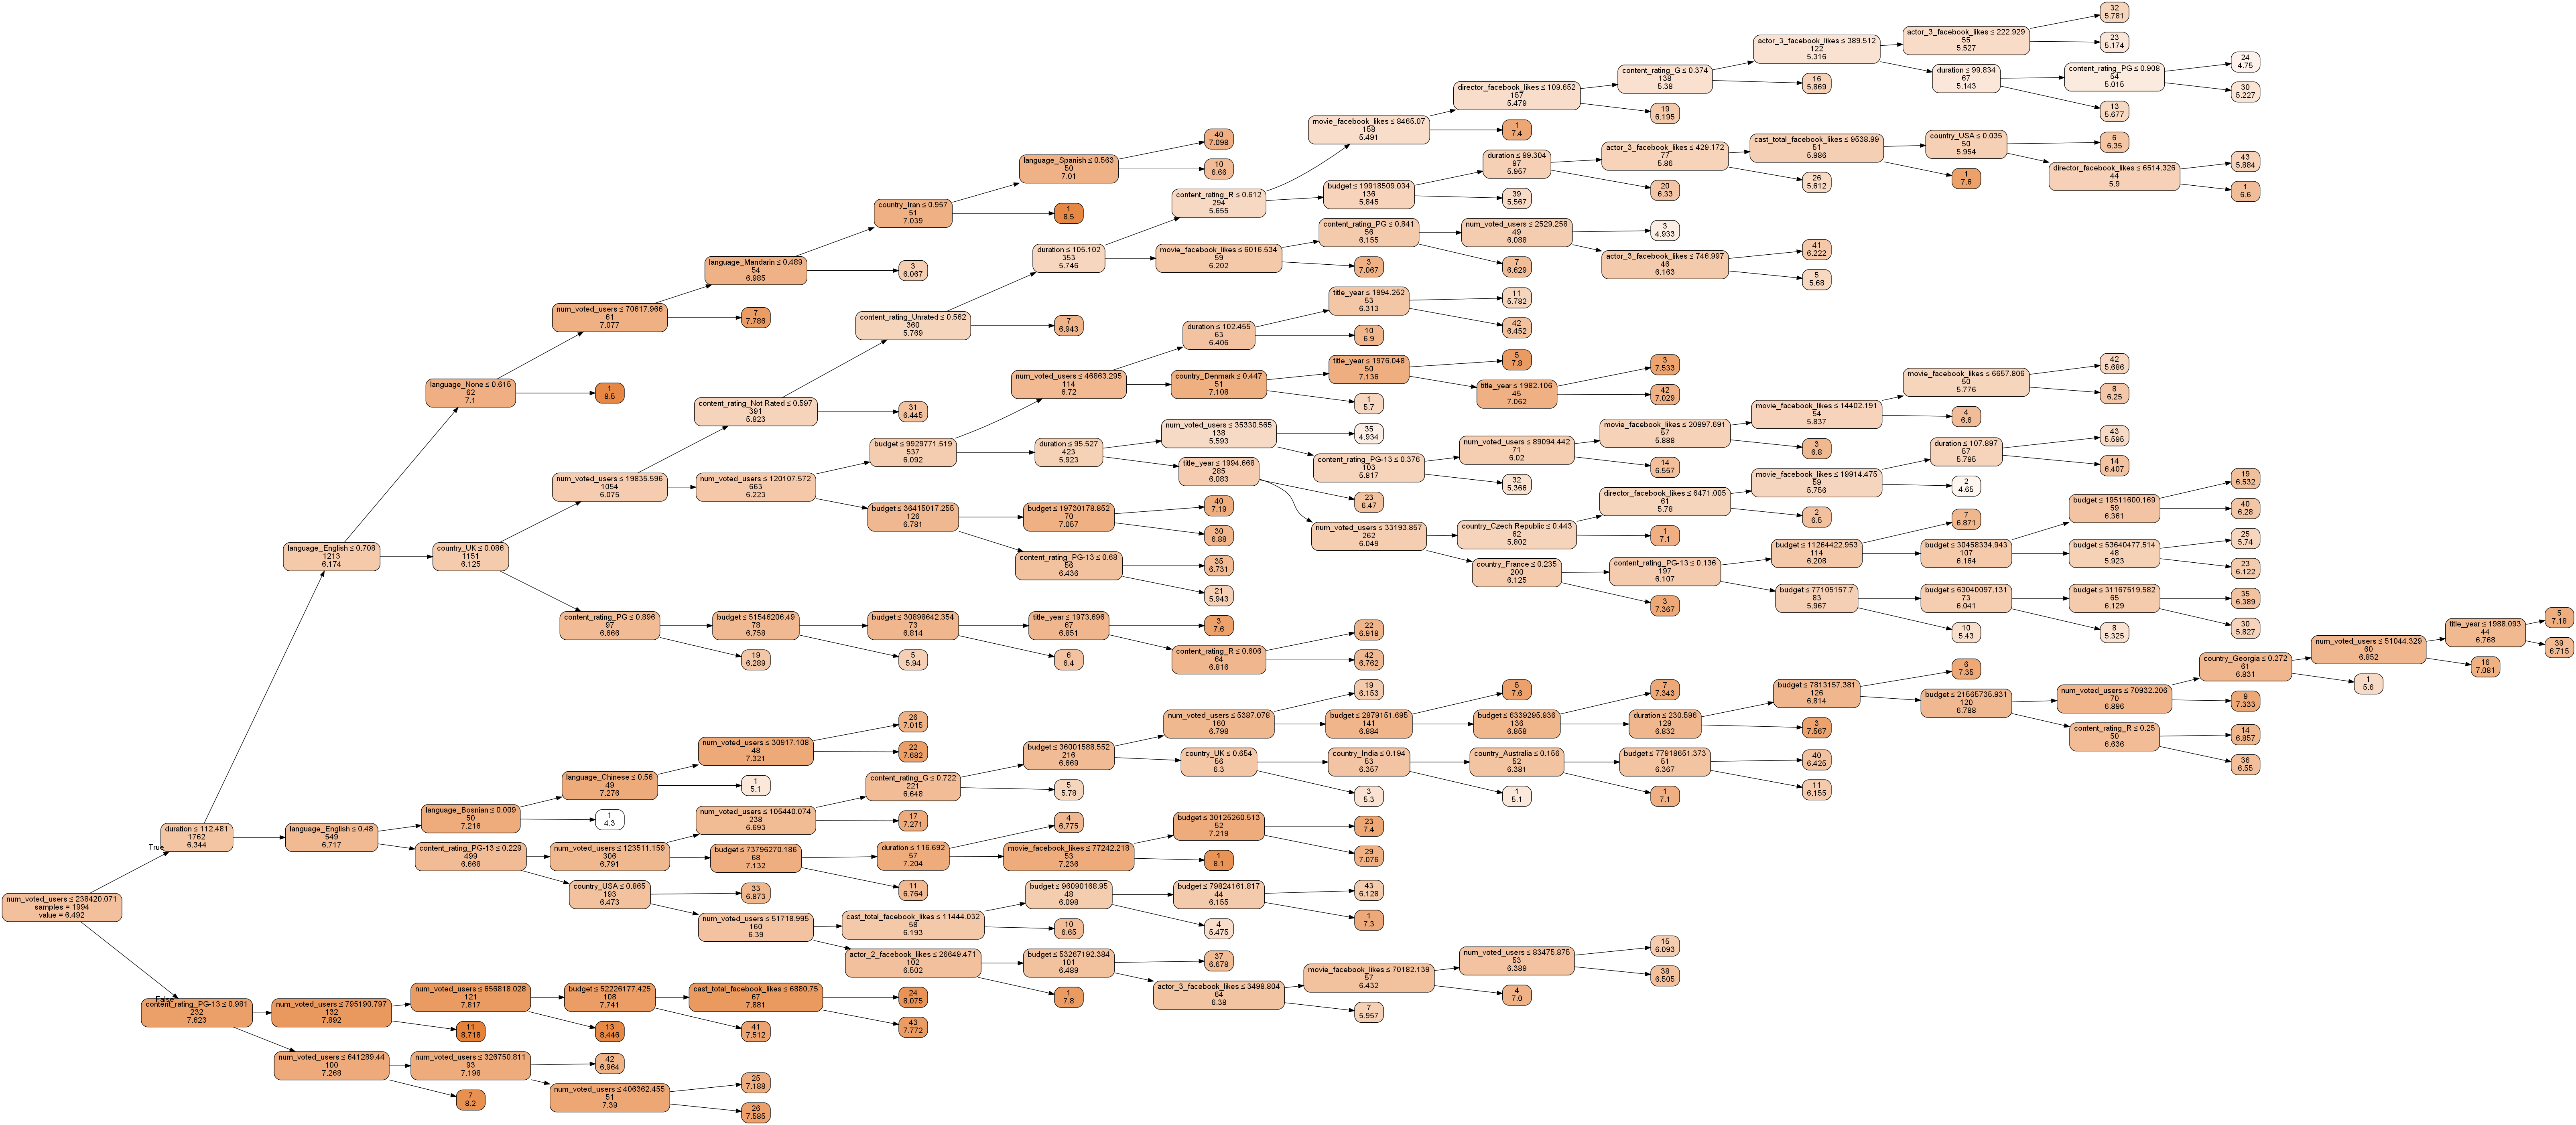

In [35]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', max_depth=55,
                           min_samples_split = 44, min_impurity_decrease = 0.0005, random_state=81)
dt.fit(X_train_s, y_train_s)
plotDecisionTree(dt, feature_names=X_train.columns, rotate=True)

In [36]:
result_df['DT_tuned'] = dt.predict(X_test)
result_df['|DT_tuned-Actual|'] = abs(result_df.DT_tuned-result_df.Actual)

<AxesSubplot:>

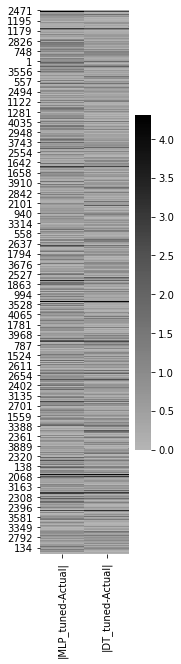

In [38]:
plt.figure(figsize=(2,10))
table = result_df[['|MLP_tuned-Actual|', '|DT_tuned-Actual|']]
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")

In [37]:
table = result_df[['|MLP_tuned-Actual|', '|DT_tuned-Actual|']]

m='DT_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,MLP_tuned,DT_tuned
ME,-0.012644,0.014058
RMSE,1.017639,0.861402
MAE,0.784453,0.639731
MAPE,13.959946,11.336460
